**1) Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.**

In [156]:
#importing all the usual things

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px
from scipy import signal

#loading the data as a dataframe
df_bottle = pd.read_csv('bottle.csv')
df_cast = pd.read_csv('cast.csv')

#looking at the bottle dataframe
df_bottle.head()

/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df_bottle.columns


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [158]:
df_cast.head()


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [159]:
df_cast.tail()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0
34403,34404,2016-11-06-C-33SR,201611,20161109340264,9340264,20-1611SR-MX-310-22:39-09340264,093.4 026.4,4,ST,-1.558,...,8.0,25.0,2.0,1015.4,20.0,17.5,1.0,2.0,2.0,6.0


### Preprocessing: Removing columns with "too much" missing data


In [160]:

#looking at how many NaNs are present in each column
print((df_bottle.isna().sum())/len(df_bottle)*100)

#removing columns with more than 75% data missing as they are unlikely to contribute in a meaningful way
#to the linear regression model in the following questions.
to_drop=[]
for col in df_bottle.columns:
    if ((df_bottle[col].isna().sum())/len(df_bottle[col])*100) > 75.0:
        to_drop.append(col) 
print(to_drop)

#Making a new dataframe without the missing data
df_bottle_less_nan = df_bottle.drop(to_drop, axis=1)
df_bottle_less_nan


#Printing the new dataframe and making sure columns were removed as intended
df_bottle_less_nan.head()
print(len(df_bottle_less_nan.columns))




Cst_Cnt                 0.000000
Btl_Cnt                 0.000000
Sta_ID                  0.000000
Depth_ID                0.000000
Depthm                  0.000000
                         ...    
TA1                    99.759037
TA2                    99.972944
pH2                    99.998844
pH1                    99.990287
DIC Quality Comment    99.993641
Length: 74, dtype: float64
['BtlNum', 'T_qual', 'S_qual', 'O_qual', 'SThtaq', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C14A2p', 'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp', 'IncTim', 'LightP', 'R_NH4', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']
49


### Preprocessing: Removing Rows with missing T and S data

In [161]:
#Dropping rows with NaN values for the T and S columns
df_no_nan = df_bottle_less_nan.dropna(subset = ["T_degC", "Salnty"])


#Printing the shape of the original and edited datasets
print(df_bottle.shape)
print(df_no_nan.shape)

(864863, 74)
(814247, 49)


### Preprocessing: Considering Data Types and Variance

In [162]:
#looking at column data types
print(df_bottle.dtypes)

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
                        ...   
TA1                    float64
TA2                    float64
pH2                    float64
pH1                    float64
DIC Quality Comment     object
Length: 74, dtype: object


In [163]:
df_bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


### Preprocessing: Removing Redundant Columns & those not of interest right now (can always add back in)
### Note that I am choosing to remove the observed temp, salinity, etc instead of the T_degC, Salnty, etc as it appears that data may have been reduced post collection and is more likely to be reflective of all info available.

In [164]:
df_preprocessed = df_no_nan.drop(["Cst_Cnt", "Btl_Cnt", "STheta", "O2Sat", "Oxy_µmol/Kg", "RecInd", "P_qual", "O2Satq", "Phaqua", "PO4q", "SiO3qu", "NO2q", "NO3q","C14A1q", "C14A2q", "MeanAq", "R_Depth", "R_TEMP", "R_POTEMP", "R_SALINITY", "R_SIGMA", "R_O2", "R_O2Sat", "R_SIO3", "R_PO4", "R_NO3", "R_NO2", "R_CHLA", "R_PHAEO", "R_PRES"], axis=1)

print(df_preprocessed.shape)

(814247, 19)


### 2) Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

           Depthm    T_degC    Salnty    O2ml_L    T_prec    S_prec    ChlorA  \
Depthm   1.000000 -0.676504  0.572867 -0.589131  0.025977  0.003203 -0.280981   
T_degC  -0.676504  1.000000 -0.505266  0.795049 -0.047593 -0.036218  0.102967   
Salnty   0.572867 -0.505266  1.000000 -0.824413 -0.019075 -0.083097 -0.031116   
O2ml_L  -0.589131  0.795049 -0.824413  1.000000 -0.005458  0.032385  0.273427   
T_prec   0.025977 -0.047593 -0.019075 -0.005458  1.000000  0.098015  0.013233   
S_prec   0.003203 -0.036218 -0.083097  0.032385  0.098015  1.000000 -0.000225   
ChlorA  -0.280981  0.102967 -0.031116  0.273427  0.013233 -0.000225  1.000000   
Chlqua   0.007008 -0.006619  0.010379 -0.012568  0.001676 -0.010142  0.087405   
Phaeop  -0.202410  0.001553 -0.004858  0.155405  0.010631 -0.000575  0.691198   
PO4uM    0.667177 -0.904942  0.825920 -0.974736  0.041997 -0.055002 -0.181266   
SiO3uM   0.846933 -0.841916  0.796056 -0.894733  0.103488 -0.006076 -0.182276   
NO2uM   -0.159724  0.098307 

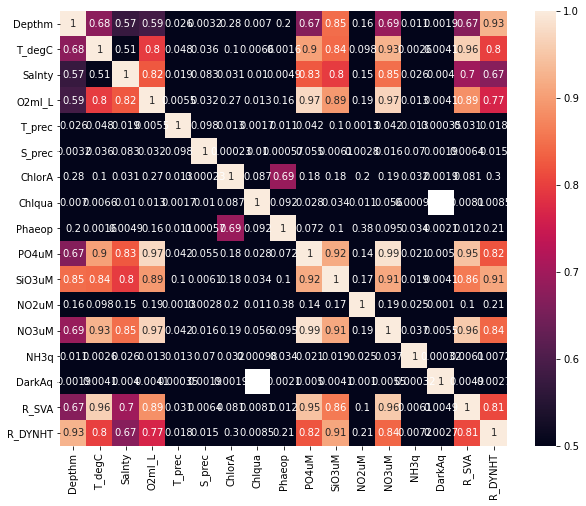

In [165]:
#Assigning the correlation matrix to a variable
corr_matrix_bottle = df_preprocessed.corr()
print(corr_matrix_bottle)


import seaborn as sns
import matplotlib.pyplot as plt


fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(abs(corr_matrix_bottle), annot = True, vmin = 0.5)


plt.show()
#Writing a function to tag and print to a separate list the variables with correlations > 0.8

#Calling the function and printing out the list from above

#Removing redunant or unneeded data from the dataset

#Writing a loop to print the correlation values for everything compared to water temp. (T_degC) and printing

There are several features that have relatively high correlations with water T. Right away, you can see that the derived variables for dynamic height and specific volume anomaly are both highly correlated. We would expect that as they are derived variables that both take in T as a factor in their calculations. Many nutrients (nitrate, silicates, and phosphate) as well as oxygen concentration are also correlated with water temperature. This is possibly related to primary productivity and remineralization processes in the upper water column. Water T is also correlated (0.68) with depth, which makes sense as well although some of the variability is likely coming from changes in upwelling. 

Overall, I noticed that quite a few features are correlated. For instance, there are relatively high correlations amongst some of the nutrients (phosphate, silicate, nitrate) with each other and also with both T and S. Chlorophyll is highly correlated with the presence of a chlorophyll producing species.


It would be interesting to look at a map and see if (and where) rivers or significant fluxes from land are entering the ocean. It seems like the dataset may be picking up some of those characteristics as well.

### Final Preprocessing Notes: 

Another step that could be taken is to normalize the data. I did not do this for the dataset at hand, but it certainly could be done. I could also go in and remove any derived variables (such as SVA, dynamic height, etc).

Of note, it would be appropriate for this dataset to either average values over each year or select a particular season only. Data were collected off of Southern California, an area known for significant upwelling. Upwelling is related to wind speed and direction which exhibits seasonal and annual variability (notably, ENSO variability likely exerts controls over the strength of upwelling in this region). To smooth some of this variability to look at typical relationships, we could make use of aggregate functions such as average. Additionally, the depth range is quite large even though the vast majority of data is within the upper 500m of the water column. Mixed layer depth may be limited due to upwelling but we could also limit the bottle data to those measurements taken in say the upper 50-100m of the water column. In a more complex project, we could grid data and take averages over each grid box as well but that is well beyond the scope of what I currently am capable of.

### Linear Regression


3) Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [167]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df_preprocessed['T_degC'].values
y = y.reshape(-1,1)

X = df_preprocessed['Salnty'].values
X = X.reshape(-1,1)

reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 27)

reg.fit(X_train, y_train)



y_pred = reg.predict(X_test)


### Mean Squared Error and R2

4) Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 


In [168]:
print("R^2: {}".format(reg.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.25327450904918913
Root Mean Squared Error: 3.656144850797423


### Plot of water T and S with trend line


5) Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

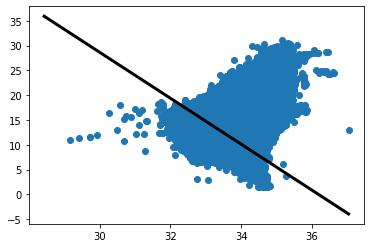

In [169]:

prediction_space = np.linspace(min(X), max(X))
y_pred_line = reg.predict(prediction_space)

plt.plot(prediction_space, y_pred_line, color='black', linewidth=3)
plt.scatter(X_test, y_test)
plt.show()

<AxesSubplot:xlabel='Salnty', ylabel='T_degC'>

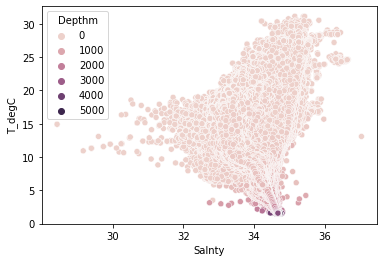

In [170]:
sns.scatterplot(data=df_preprocessed, x='Salnty', y='T_degC', hue='Depthm')

### Polynomial Regression Discussion


6) Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 



As discussed in the article provided, polynomial transformation is a type of data engineering. Sometimes, as seen above in our oceanographic data, the relationship between features in a dataset is not a simple linear relationship. Many times, these features interact in ways that can be difficult to predict and may not always be linear at all. By using polynomial transformation, followed by standard data modeling, it is possible to more accurately capture these interactions and relationships compared to a simple linear model. New input features such as raising raw values to a power or multiplying input variables (called interactions) together to make a new feature are created using polynomial transformation. The degree controls the number of new features added; typically this is limited to small degrees (usually 2 or 3). Many linear modeling techniques (such as linear regression) work quite well with these types of polynomial transformations. These transformations can significantly decrease the complexity of models used for regression since all of that complexity is moved from the modeling to the preprocessing steps. While these transformations can lead to increase in model performance, they are not without a cost. A significant number of new input features may be created in this process. 

In addition to just transforming our data to perform a linear regression (or knn model), we can also fit a polynomial curve to our training data. 

A general form of a polynomial equation is something like:
y = a + bx + cx^2 + dx^3...

This is a more complex model but it is still considered as being linear while allowing us to adjust for more complex relationships in the data to achieve a better fitting model. Generally, low-order polynomial functions are used. Higher order polynomials may fit the data well but may not have a meaningful real-world explanation and can lead to some complicated trendlines.

### 7) Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

### 8) Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 



shape (244275, 1)
degree = 1
R^2 poly: 0.25327452687459007
Root Mean Squared Error Poly: 3.6561448071587304
degree = 2
R^2 poly: 0.2684144483868165
Root Mean Squared Error Poly: 3.6188906864781747
degree = 3
R^2 poly: 0.2722445095951792
Root Mean Squared Error Poly: 3.60940528762698
degree = 4
R^2 poly: 0.3410212332165702
Root Mean Squared Error Poly: 3.4346193755682193
degree = 5
R^2 poly: 0.3516176610423437
Root Mean Squared Error Poly: 3.4068929951468507
(244275, 1) 244275


/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86867e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


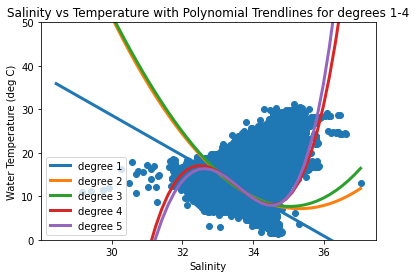

In [177]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#print("shape", X_test.shape)

pred_space_poly = np.linspace(min(X), max(X))

for count, deg in enumerate([1,2,3,4,5]):
    poly = make_pipeline(PolynomialFeatures(deg),Ridge())
    poly.fit(X_train, y_train)
    y_predict_poly = poly.predict(X_test)
    #plt.plot(X_test, y_test, linedwidth=3)
    print("degree =", deg)
    print("R^2 poly: {}".format(poly.score(X_test, y_test)))
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_predict_poly))
    print("Root Mean Squared Error Poly: {}".format(rmse_poly))
    y_plot = poly.predict(pred_space_poly)
    plt.plot(pred_space_poly, y_plot,linewidth=3, label = "degree %d" % deg )
    



print(X_test.shape, len(y_test))    
plt.scatter(X_test, y_test)

plt.ylim([0, 50])

plt.legend(loc='lower left')

plt.xlabel("Salinity")
plt.ylabel("Water Temperature (deg C)")
plt.title("Salinity vs Temperature with Polynomial Trendlines for degrees 1-4")

plt.show()
